In [45]:
import matplotlib.pylab as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from IPython.display import  Image
from tensorflow.keras.layers import Rescaling

In [46]:
import pathlib
path = '/content/drive/MyDrive/DataAi/training'
data_dir = pathlib.Path(path)

In [47]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

246


In [48]:
batch_size = 16
img_height = 180
img_width = 180

In [49]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 246 files belonging to 2 classes.
Using 197 files for training.
Found 246 files belonging to 2 classes.
Using 49 files for validation.


In [50]:
class_names = train_ds.class_names
print(class_names)

['healthy', 'rotten']


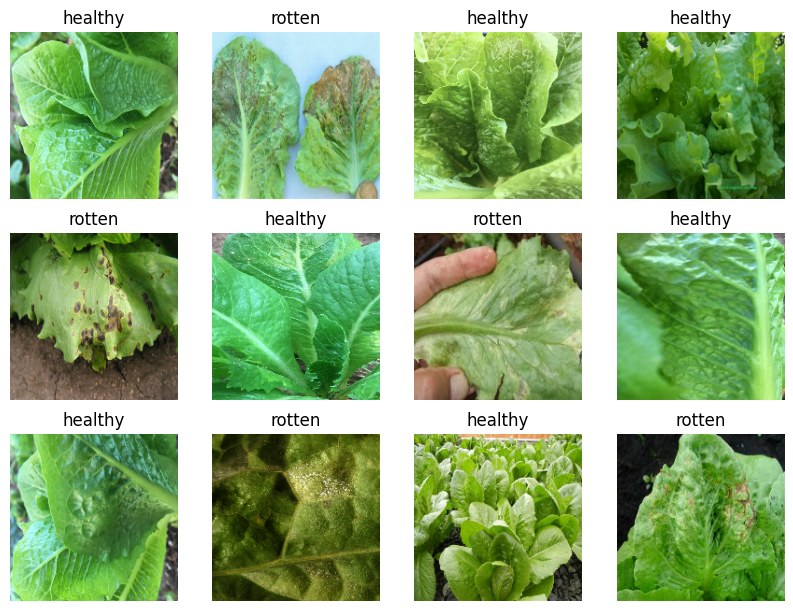

In [51]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [52]:

normalization_layer = Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [53]:
num_classes = 2

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])

In [54]:

model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 64800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     4,147,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,152,482 (15.84 MB)

 Trainable params: 4,152,482 (15.84 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:

epochs=30
history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 769ms/step - accuracy: 1.0000 - loss: 0.0195 - val_accuracy: 0.9592 - val_loss: 0.0745
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 863ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0369
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 943ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9796 - val_loss: 0.0436
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 853ms/step - accuracy: 1.0000 - loss: 8.6353e-04 - val_accuracy: 1.0000 - val_loss: 0.0284
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 916ms/step - accuracy: 1.0000 - loss: 5.6794e-04 - val_accuracy: 0.9796 - val_loss: 0.0348
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 938ms/step - accuracy: 1.0000 - loss: 3.9000e-04 - val_accuracy: 1.0000 - val_loss: 0.0290
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 921ms/step - accuracy: 1.0000 - loss: 3.2777e-04 - val_accuracy: 1.0000 - val_loss: 0.0292
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 850ms/step - accuracy: 1.0000 - loss: 2

In [68]:

from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/DataAi/model_plant.h5')

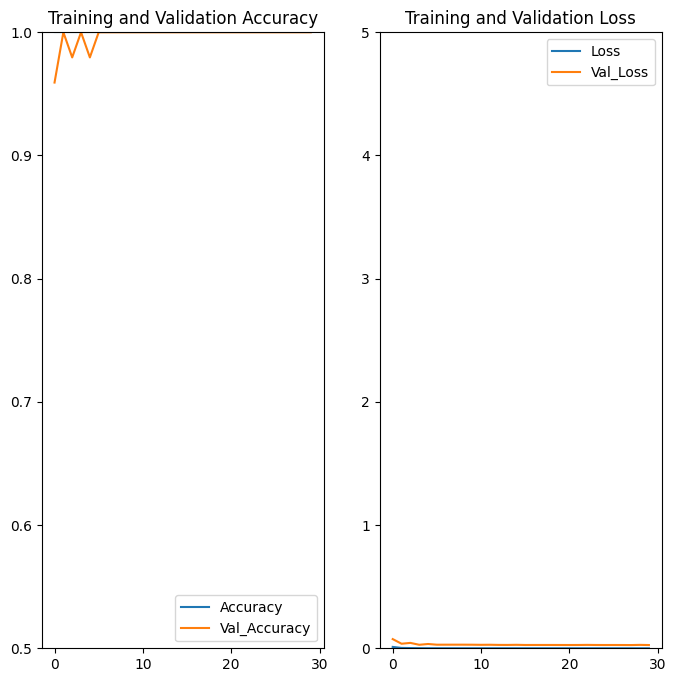

In [69]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Accuracy')
plt.plot(epochs_range, val_acc, label='Val_Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss')
plt.plot(epochs_range, val_loss, label='Val_Loss')
plt.legend(loc='upper right')
plt.ylim([0,5])
plt.title('Training and Validation Loss')
plt.show()

In [70]:

from tensorflow.keras.models import load_model
model2 =load_model('/content/drive/MyDrive/DataAi/model_plant.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


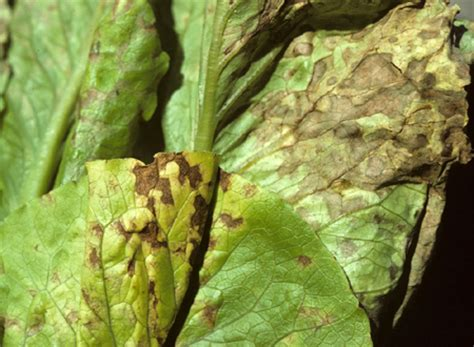


Result image input to :>> rotten << 100.00 %


In [74]:


class_names = ['healthy', 'rotten']
path = '/content/drive/MyDrive/DataAi/p4.jpg'
img = keras.preprocessing.image.load_img( path,
                                         target_size=(
                                             img_height,img_width
                                         ))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predict = model2.predict(img_array)
score = tf.nn.softmax(predict[0])
display(Image(filename=path, width = 224, height = 224))
print("\nResult image input to :>> " + class_names[np.argmax(score)]+" << {:.2f} %".format(100*np.max(score)))